# delhi aqi

In [1]:
with open("cleaned_air_quality (1).json", "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())


date,pm25,pm10,o3,no2,so2,co

,108.0,51.0,23.0,3.0,1.0,7.0

2013-12-31,165.34425439653094,196.0,30.0,11.0,9.0,19.0

2014-10-01,124.0,79.0,38.0,36.0,5.63036218854354,5.0

2014-10-02,127.0,120.5597800095648,22.371807228915664,24.795908543922984,5.63036218854354,9.759313014029996



In [2]:
import pandas as pd

df = pd.read_csv("cleaned_air_quality (1).json")  # even if extension is .json, content is CSV

df.head()


,date,pm25,pm10,o3,no2,so2,co
0,NaN,108.000000,51.00000,23.000000,3.000000,1.000000,7.000000
1,2013-12-31,165.344254,196.00000,30.000000,11.000000,9.000000,19.000000
2,2014-10-01,124.000000,79.00000,38.000000,36.000000,5.630362,5.000000
3,2014-10-02,127.000000,120.55978,22.371807,24.795909,5.630362,9.759313
4,2014-10-05,165.344254,97.00000,35.000000,73.000000,1.000000,12.000000


preprocessing

In [3]:
df = df.dropna(subset=["date"])


In [4]:
df.head()

,date,pm25,pm10,o3,no2,so2,co
1,2013-12-31,165.344254,196.00000,30.000000,11.000000,9.000000,19.000000
2,2014-10-01,124.000000,79.00000,38.000000,36.000000,5.630362,5.000000
3,2014-10-02,127.000000,120.55978,22.371807,24.795909,5.630362,9.759313
4,2014-10-05,165.344254,97.00000,35.000000,73.000000,1.000000,12.000000
5,2014-10-06,170.000000,105.00000,44.000000,73.000000,1.000000,10.000000


In [5]:
df["date"] = pd.to_datetime(df["date"])


In [6]:
df = df.sort_values("date")
df = df.reset_index(drop=True)


In [7]:
df = df.set_index("date")


In [8]:
df.isna().sum()


pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64

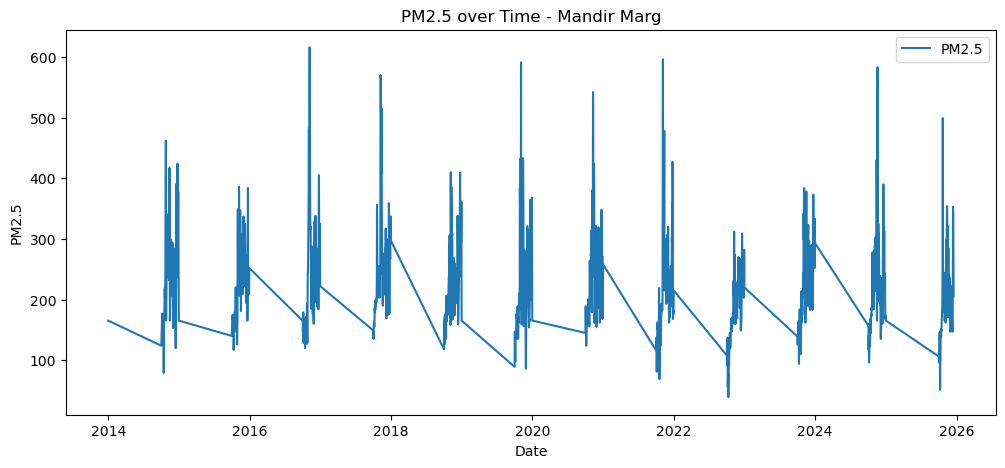

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df["pm25"], label="PM2.5")
plt.title("PM2.5 over Time - Mandir Marg")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.legend()
plt.show()


In [10]:
df.tail()

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2025-12-12,226.0,361.00000,18.000000,31.000000,15.000000,13.000000
2025-12-13,353.0,323.00000,16.000000,22.000000,13.000000,16.000000
2025-12-14,337.0,228.00000,26.000000,18.000000,13.000000,10.000000
2025-12-15,269.0,166.00000,25.000000,16.000000,15.000000,4.000000
2025-12-16,205.0,120.55978,22.371807,24.795909,5.630362,9.759313


In [11]:
df.index.max()


Timestamp('2025-12-16 00:00:00')

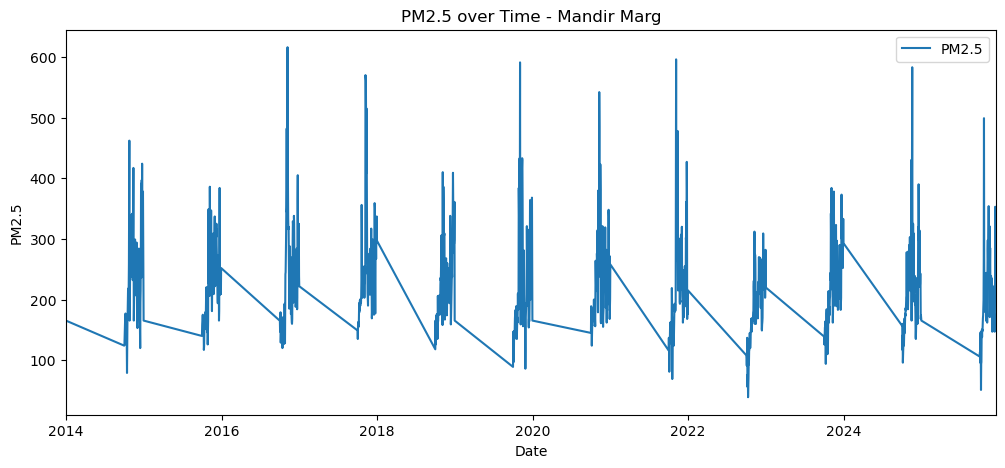

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["pm25"], label="PM2.5")
plt.xlim(df.index.min(), df.index.max())
plt.title("PM2.5 over Time - Mandir Marg")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.legend()
plt.show()


aqi calculation

In [13]:
# AQI breakpoints for PM2.5 and PM10 (India standard - simplified)

PM25_BREAKPOINTS = [
    (0, 30, 0, 50),
    (31, 60, 51, 100),
    (61, 90, 101, 200),
    (91, 120, 201, 300),
    (121, 250, 301, 400),
    (251, 500, 401, 500),
]

PM10_BREAKPOINTS = [
    (0, 50, 0, 50),
    (51, 100, 51, 100),
    (101, 250, 101, 200),
    (251, 350, 201, 300),
    (351, 430, 301, 400),
    (431, 600, 401, 500),
]


In [14]:
def calculate_sub_aqi(concentration, breakpoints):
    if pd.isna(concentration):
        return np.nan
    
    for (blo, bhi, ilo, ihi) in breakpoints:
        if blo <= concentration <= bhi:
            return ((ihi - ilo) / (bhi - blo)) * (concentration - blo) + ilo
    
    # If concentration is above highest range
    return 500


In [15]:
df["AQI_PM25"] = df["pm25"].apply(lambda x: calculate_sub_aqi(x, PM25_BREAKPOINTS))
df["AQI_PM10"] = df["pm10"].apply(lambda x: calculate_sub_aqi(x, PM10_BREAKPOINTS))


In [16]:
df[["pm25", "AQI_PM25", "pm10", "AQI_PM10"]].head()


,pm25,AQI_PM25,pm10,AQI_PM10
date,,,,
2013-12-31,165.344254,335.031637,196.00000,164.120805
2014-10-01,124.000000,303.302326,79.00000,79.000000
2014-10-02,127.000000,305.604651,120.55978,113.996095
2014-10-05,165.344254,335.031637,97.00000,97.000000
2014-10-06,170.000000,338.604651,105.00000,103.657718


In [17]:
df["AQI"] = df[["AQI_PM25", "AQI_PM10"]].max(axis=1)


In [18]:
df[["AQI_PM25", "AQI_PM10", "AQI"]].head()


,AQI_PM25,AQI_PM10,AQI
date,,,
2013-12-31,335.031637,164.120805,335.031637
2014-10-01,303.302326,79.000000,303.302326
2014-10-02,305.604651,113.996095,305.604651
2014-10-05,335.031637,97.000000,335.031637
2014-10-06,338.604651,103.657718,338.604651


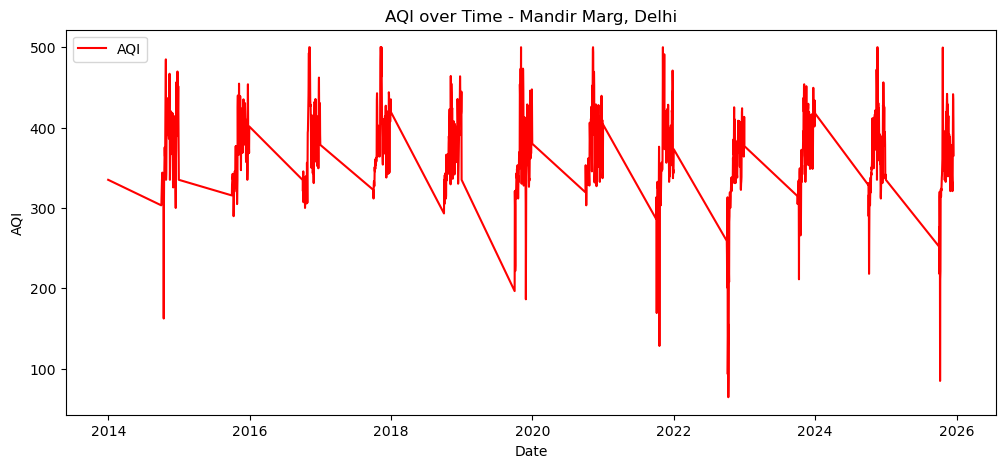

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df["AQI"], label="AQI", color="red")
plt.title("AQI over Time - Mandir Marg, Delhi")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()


# model building

In [20]:
aqi_series = df["AQI"].values


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
aqi_scaled = scaler.fit_transform(aqi_series.reshape(-1, 1))


In [22]:
def create_sequences(data, lookback=30, horizon=7):
    X, y = [], []
    for i in range(len(data) - lookback - horizon + 1):
        X.append(data[i : i + lookback])
        y.append(data[i + lookback : i + lookback + horizon])
    return np.array(X), np.array(y)


In [23]:
import numpy as np


In [24]:
LOOKBACK = 30   # past 30 days
HORIZON = 7     # predict next 7 days

X, y = create_sequences(aqi_scaled, LOOKBACK, HORIZON)

print(X.shape, y.shape)


(1045, 30, 1) (1045, 7, 1)


In [25]:
split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(X_train.shape, X_test.shape)


(836, 30, 1) (209, 30, 1)


In [26]:
y_train.shape, y_test.shape


((836, 7, 1), (209, 7, 1))

In [200]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [201]:
import tensorflow

In [28]:
import sys
sys.executable


'D:\\Anaconda\\python.exe'

In [29]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(LOOKBACK, 1)))
model.add(Dropout(0.2))

model.add(LSTM(32))
model.add(Dropout(0.2))

model.add(Dense(HORIZON))  # Output = next 7 days

model.compile(optimizer="adam", loss="mse")

model.summary()


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,543 (115.40 KB)

 Trainable params: 29,543 (115.40 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train.reshape(y_train.shape[0], HORIZON),
    validation_data=(X_test, y_test.reshape(y_test.shape[0], HORIZON)),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.1738 - val_loss: 0.0176
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0467 - val_loss: 0.0157
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0402 - val_loss: 0.0151
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0364 - val_loss: 0.0150
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0343 - val_loss: 0.0149
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0329 - val_loss: 0.0162
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0309 - val_loss: 0.0168
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0293 - val_loss: 0.0140
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0273 - val_loss: 0.0146
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0259 - val_loss: 0.0137
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0244 - val_loss: 0.0144
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0

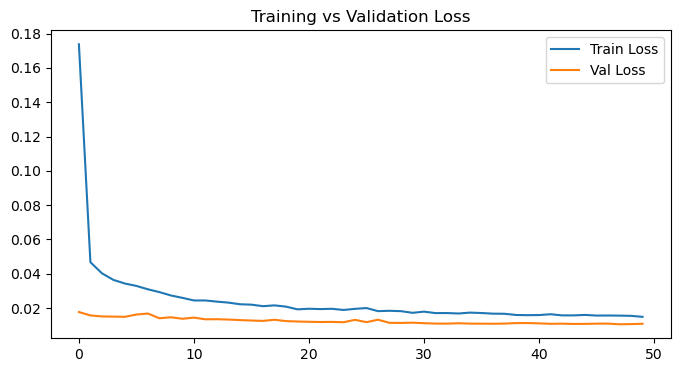

In [31]:
plt.figure(figsize=(8,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


# evaluation

In [32]:
y_pred = model.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


In [33]:
# Reshape for inverse scaling
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)


In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0]))
print("Test RMSE (Day 1 forecast):", rmse)


Test RMSE (Day 1 forecast): 39.063745733534255


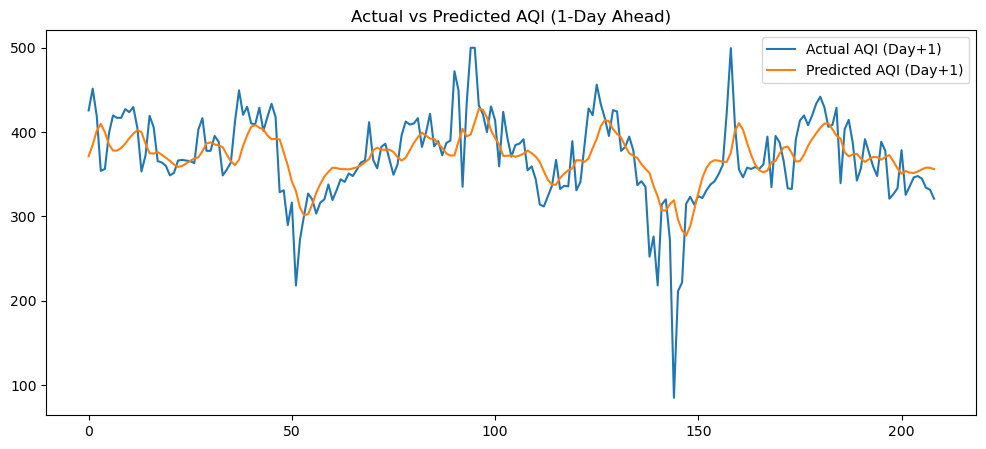

In [35]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv[:, 0], label="Actual AQI (Day+1)")
plt.plot(y_pred_inv[:, 0], label="Predicted AQI (Day+1)")
plt.title("Actual vs Predicted AQI (1-Day Ahead)")
plt.legend()
plt.show()


In [36]:
LOOKBACK = 14   # past 14 days
FORECAST = 7    # predict next 7 days


In [37]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Use AQI column (change name if needed)
aqi_values = df['AQI'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aqi_values)

print("Scaled data shape:", scaled_data.shape)


Scaled data shape: (1081, 1)


In [38]:
LOOKBACK = 14

last_14_days = scaled_data[-LOOKBACK:]
X_future = last_14_days.reshape(1, LOOKBACK, 1)


In [39]:
future_pred_scaled = model.predict(X_future)
future_pred_delhi = scaler.inverse_transform(future_pred_scaled.reshape(-1, 1))

print("Next 7 days AQI prediction:")
print(future_pred_delhi.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
Next 7 days AQI prediction:
[394.11353 396.09445 394.319   390.01175 391.67047 391.54935 388.01443]


In [214]:
df.columns


Index(['pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI_PM25', 'AQI_PM10',
       'AQI'],
      dtype='object')

In [41]:
last_date = df.index.max()
print(last_date)


2025-12-16 00:00:00


In [42]:
import pandas as pd

future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)
print(future_dates)


DatetimeIndex(['2025-12-17', '2025-12-18', '2025-12-19', '2025-12-20',
               '2025-12-21', '2025-12-22', '2025-12-23'],
              dtype='datetime64[ns]', freq='D')


In [43]:
forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_AQI": future_pred_delhi.flatten()
})

forecast_df


,Date,Predicted_AQI
0,2025-12-17,394.113525
1,2025-12-18,396.094452
2,2025-12-19,394.319000
3,2025-12-20,390.011749
4,2025-12-21,391.670471
5,2025-12-22,391.549347
6,2025-12-23,388.014435


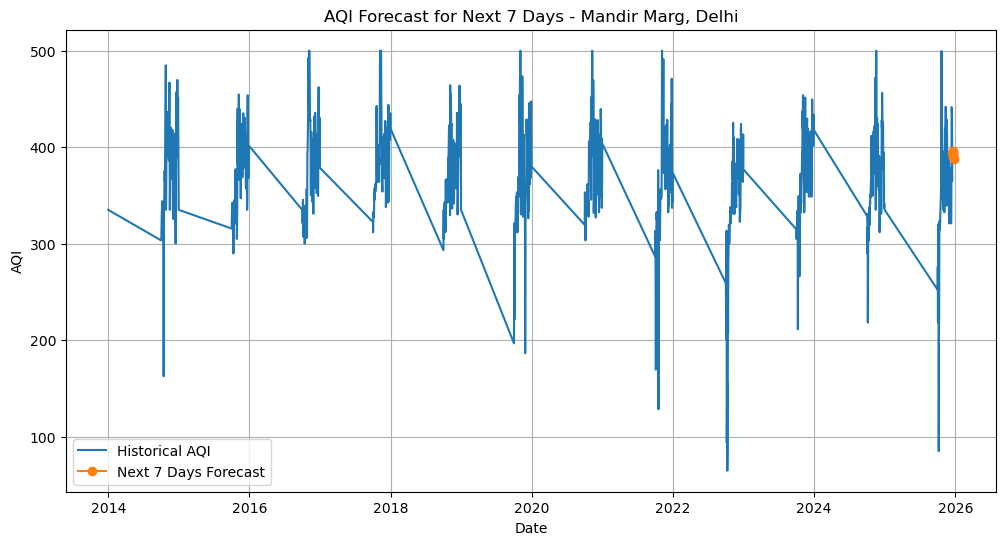

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Historical AQI (date is index)
plt.plot(df.index, df["AQI"], label="Historical AQI")

# Forecast
plt.plot(future_dates, future_pred_delhi.flatten(), marker="o", label="Next 7 Days Forecast")

plt.title("AQI Forecast for Next 7 Days - Mandir Marg, Delhi")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()


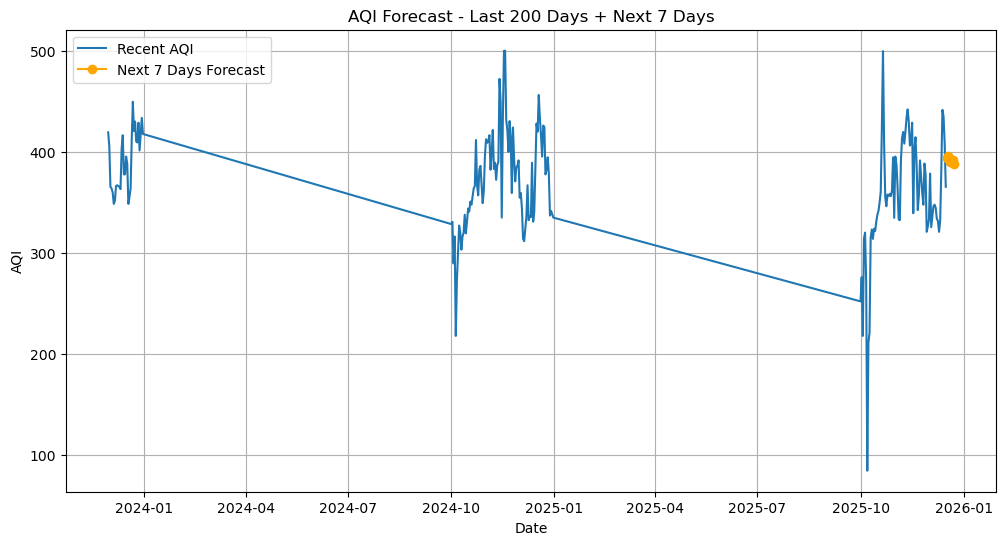

In [45]:
# Zoom into last 60 days + forecast
plt.figure(figsize=(12,6))

plt.plot(df.index[-200:], df["AQI"].values[-200:], label="Recent AQI")
plt.plot(future_dates, future_pred_delhi.flatten(), marker="o", color="orange", label="Next 7 Days Forecast")

plt.title("AQI Forecast - Last 200 Days + Next 7 Days")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()


In [46]:
model.save("lstm_delhi.h5")

import pickle
with open("scaler_delhi.pkl", "wb") as f:
    pickle.dump(scaler, f)


# hebbal station

Data preprocessing

In [47]:
import pandas as pd

df_blr = pd.read_csv("hebbal,-bengaluru-air-quality.csv")  
df_blr.head()


,date,pm25,pm10,o3,no2,so2,co
0,2026/2/1,99,78,5,15,5,6
1,2026/2/2,140,,5,16,5,6
2,2026/2/4,80,58,7,14,5,7
3,2026/2/5,82,66,3,15,5,10
4,2026/2/6,104,75,3,17,5,8


In [48]:
df_blr["date"] = pd.to_datetime(df_blr["date"], errors="coerce")

df_blr = df_blr.dropna(subset=["date"])
df_blr = df_blr.sort_values("date")
df_blr = df_blr.reset_index(drop=True)

df_blr.head()


,date,pm25,pm10,o3,no2,so2,co
0,2018-11-23,,28,,19,2,16
1,2018-11-24,65,,,,,
2,2018-12-20,,81,12,20,,10
3,2018-12-21,139,67,7,19,,10
4,2018-12-22,126,63,6,14,,8


In [49]:
df_blr.isna().sum()


date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64

In [50]:
df_blr = df_blr.interpolate(method="linear")
df_blr = df_blr.fillna(method="ffill")
df_blr = df_blr.fillna(method="bfill")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15828\2630556071.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_blr = df_blr.interpolate(method="linear")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15828\2630556071.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_blr = df_blr.fillna(method="ffill")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15828\2630556071.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_blr = df_blr.fillna(method="bfill")


In [51]:
print(df_blr.columns)


Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')


In [52]:
df_blr.columns = df_blr.columns.str.strip()
print(df_blr.columns)


Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')


In [54]:
pollutant_cols = ["pm25", "pm10", "no2", "so2", "co", "o3"]

for col in pollutant_cols:
    df_blr[col] = pd.to_numeric(df_blr[col], errors="coerce")

df_blr = df_blr.dropna(subset=pollutant_cols)


In [55]:
df_blr["date"] = pd.to_datetime(df_blr["date"], errors="coerce")
df_blr = df_blr.dropna(subset=["date"])
df_blr = df_blr.sort_values("date")
df_blr = df_blr.set_index("date")


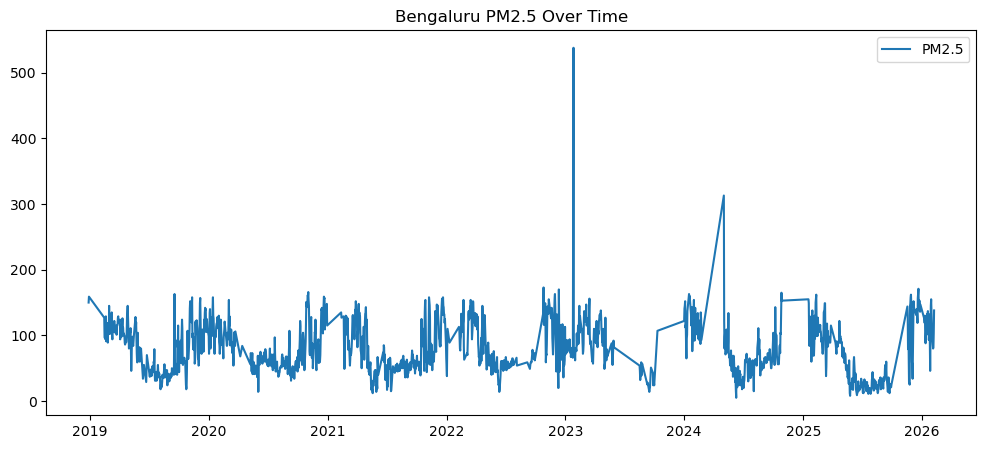

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_blr.index, df_blr["pm25"], label="PM2.5")
plt.title("Bengaluru PM2.5 Over Time")
plt.legend()
plt.show()


In [57]:
df_blr.tail()

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2026-02-01,99.0,78.0,5.0,15.0,5.0,6.0
2026-02-04,80.0,58.0,7.0,14.0,5.0,7.0
2026-02-05,82.0,66.0,3.0,15.0,5.0,10.0
2026-02-06,104.0,75.0,3.0,17.0,5.0,8.0
2026-02-07,138.0,81.0,3.0,17.0,4.0,8.0


In [58]:
# Cut Bengaluru data to match Delhi end date
df_blr_matched = df_blr[df_blr.index <= "2025-12-16"]


In [59]:
df_blr_matched.index.min(), df_blr_matched.index.max()


(Timestamp('2018-12-28 00:00:00'), Timestamp('2025-12-16 00:00:00'))

In [60]:
# Example (you already used something like this for Delhi)

PM25_BREAKPOINTS = [
    (0, 30, 0, 50),
    (31, 60, 51, 100),
    (61, 90, 101, 200),
    (91, 120, 201, 300),
    (121, 250, 301, 400),
    (251, 500, 401, 500),
]

PM10_BREAKPOINTS = [
    (0, 50, 0, 50),
    (51, 100, 51, 100),
    (101, 250, 101, 200),
    (251, 350, 201, 300),
    (351, 430, 301, 400),
    (431, 600, 401, 500),
]

def calculate_sub_aqi(concentration, breakpoints):
    if pd.isna(concentration):
        return np.nan
    for (blo, bhi, ilo, ihi) in breakpoints:
        if blo <= concentration <= bhi:
            return ((ihi - ilo) / (bhi - blo)) * (concentration - blo) + ilo
    return 500


In [61]:
df_blr_matched["AQI_PM25"] = df_blr_matched["pm25"].apply(lambda x: calculate_sub_aqi(x, PM25_BREAKPOINTS))
df_blr_matched["AQI_PM10"] = df_blr_matched["pm10"].apply(lambda x: calculate_sub_aqi(x, PM10_BREAKPOINTS))

df_blr_matched["AQI"] = df_blr_matched[["AQI_PM25", "AQI_PM10"]].max(axis=1)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15828\3691141367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blr_matched["AQI_PM25"] = df_blr_matched["pm25"].apply(lambda x: calculate_sub_aqi(x, PM25_BREAKPOINTS))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15828\3691141367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blr_matched["AQI_PM10"] = df_blr_matched["pm10"].apply(lambda x: calculate_sub_aqi(x, PM10_BREAKPOINTS))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15828\3691141367.py:4: 

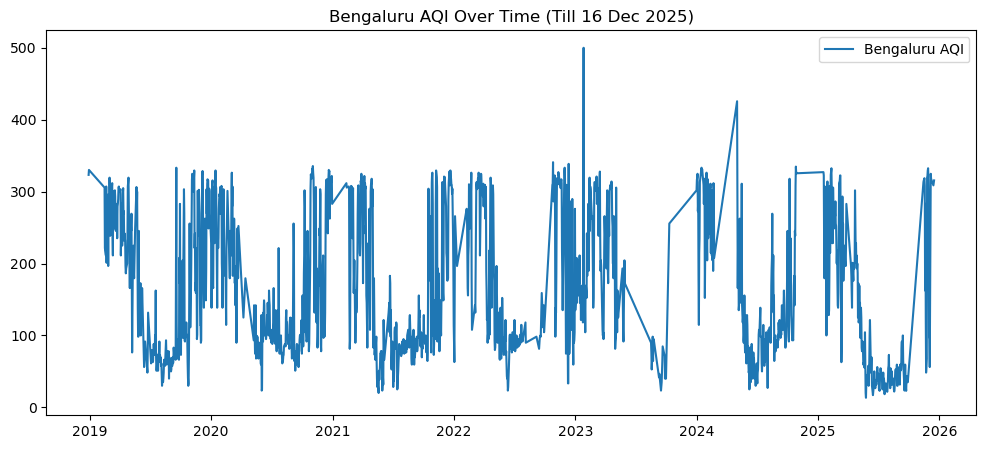

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_blr_matched.index, df_blr_matched["AQI"], label="Bengaluru AQI")
plt.title("Bengaluru AQI Over Time (Till 16 Dec 2025)")
plt.legend()
plt.show()


In [63]:
df_blr_matched

,pm25,pm10,o3,no2,so2,co,AQI_PM25,AQI_PM10,AQI
date,,,,,,,,,
2018-12-28,150.0,78.0,8.0,19.0,1.0,7.0,323.255814,78.0,323.255814
2018-12-29,159.0,71.0,11.0,16.0,4.0,7.0,330.162791,71.0,330.162791
2019-02-14,127.0,59.0,64.0,10.0,2.0,15.0,305.604651,59.0,305.604651
2019-02-15,97.0,54.0,42.0,3.0,3.0,11.0,221.482759,54.0,221.482759
2019-02-18,94.0,71.0,19.0,18.0,3.0,15.0,211.241379,71.0,211.241379
...,...,...,...,...,...,...,...,...,...
2025-12-05,107.0,77.0,5.0,9.0,2.0,3.0,255.620690,77.0,255.620690
2025-12-06,152.0,72.0,3.0,8.0,1.0,3.0,324.790698,72.0,324.790698
2025-12-07,143.0,67.0,4.0,9.0,2.0,3.0,317.883721,67.0,317.883721


In [64]:
blr_aqi_values = df_blr_matched["AQI"].values.reshape(-1, 1)


In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler_blr = MinMaxScaler(feature_range=(0, 1))
blr_scaled = scaler_blr.fit_transform(blr_aqi_values)


In [66]:
import numpy as np

LOOKBACK = 14

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

X_blr, y_blr = create_sequences(blr_scaled, LOOKBACK)

print(X_blr.shape, y_blr.shape)


(1709, 14, 1) (1709, 1)


In [67]:
print(X_blr.shape, y_blr.shape)


(1709, 14, 1) (1709, 1)


In [68]:
split = int(len(X_blr) * 0.8)

X_blr_train, X_blr_test = X_blr[:split], X_blr[split:]
y_blr_train, y_blr_test = y_blr[:split], y_blr[split:]

print(X_blr_train.shape, X_blr_test.shape)
print(y_blr_train.shape, y_blr_test.shape)


(1367, 14, 1) (342, 14, 1)
(1367, 1) (342, 1)


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_blr = Sequential([
    LSTM(64, return_sequences=True, input_shape=(14, 1)),
    LSTM(32),
    Dense(1)
])

model_blr.compile(optimizer="adam", loss="mse")

model_blr.summary()


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 14, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
history_blr = model_blr.fit(
    X_blr_train, y_blr_train,
    validation_data=(X_blr_test, y_blr_test),
    epochs=50,
    batch_size=32
)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0292 - val_loss: 0.0174
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0187 - val_loss: 0.0167
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176 - val_loss: 0.0163
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0173 - val_loss: 0.0156
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0168 - val_loss: 0.0152
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0159 - val_loss: 0.0146
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - val_loss: 0.0154
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0146 - val_loss: 0.0132
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - val_loss: 0.0123
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0132 - val_loss: 0.0112
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0127 - val_loss: 0.0108
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

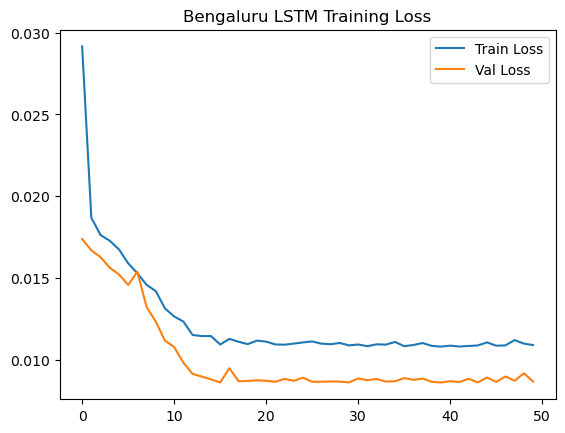

In [71]:
import matplotlib.pyplot as plt

plt.plot(history_blr.history["loss"], label="Train Loss")
plt.plot(history_blr.history["val_loss"], label="Val Loss")
plt.title("Bengaluru LSTM Training Loss")
plt.legend()
plt.show()


In [72]:
LOOKBACK = 14

last_14_blr = blr_scaled[-LOOKBACK:]


In [73]:
future_preds_blr_scaled = []

current_input = last_14_blr.copy()

for i in range(7):
    X_input = current_input.reshape(1, LOOKBACK, 1)
    
    pred = model_blr.predict(X_input, verbose=0)
    future_preds_blr_scaled.append(pred[0,0])
    
    # append prediction and remove first value
    current_input = np.vstack([current_input[1:], pred])


In [74]:
future_preds_blr_scaled = np.array(future_preds_blr_scaled).reshape(-1, 1)
future_preds_blr = scaler_blr.inverse_transform(future_preds_blr_scaled)

future_preds_blr


array([[300.33545],
       [284.66287],
       [274.17783],
       [266.6329 ],
       [261.069  ],
       [257.31158],
       [255.17953]], dtype=float32)

In [75]:
last_date_blr = df_blr_matched.index.max()
future_dates_blr = pd.date_range(start=last_date_blr + pd.Timedelta(days=1), periods=7)


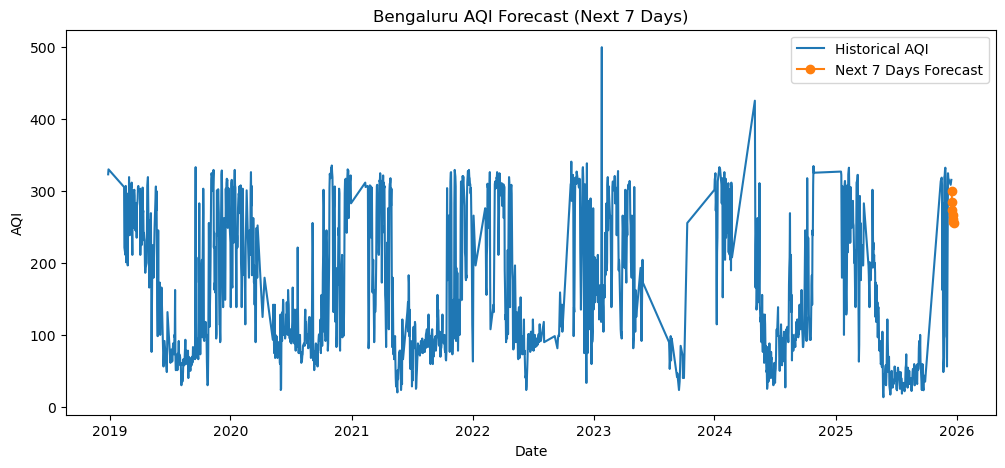

In [76]:
plt.figure(figsize=(12,5))
plt.plot(df_blr_matched.index, df_blr_matched["AQI"], label="Historical AQI")
plt.plot(future_dates_blr, future_preds_blr.flatten(), marker="o", label="Next 7 Days Forecast")
plt.title("Bengaluru AQI Forecast (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()


In [77]:
model.save("lstm_blr.h5")

with open("scaler_blr.pkl", "wb") as f:
    pickle.dump(scaler, f)


# tvm

In [78]:
import pandas as pd

df_tvpm = pd.read_csv("kariavattom,-thiruvananthapuram, india-air-quality.csv") 

df_tvpm.head()


,date,pm25,pm10,o3,no2,so2,co
0,2026/2/1,232,51,14,1,27,9
1,2026/2/2,125,61,14,2,1,13
2,2026/2/3,152,66,14,2,2,10
3,2026/2/4,159,56,14,2,4,10
4,2026/2/5,138,60,14,3,4,11


In [79]:
df_tvpm.columns = df_tvpm.columns.str.strip().str.lower()
df_tvpm.columns


Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [80]:
df_tvpm["date"] = pd.to_datetime(df_tvpm["date"], errors="coerce")
df_tvpm = df_tvpm.sort_values("date")


In [81]:
df_tvpm = df_tvpm.dropna(subset=["date"])


In [82]:
pollutants = ["pm25", "pm10", "no2", "so2", "co", "o3"]

for col in pollutants:
    if col in df_tvpm.columns:
        df_tvpm[col] = pd.to_numeric(df_tvpm[col], errors="coerce")


In [83]:
df_tvpm = df_tvpm.dropna(subset=pollutants)


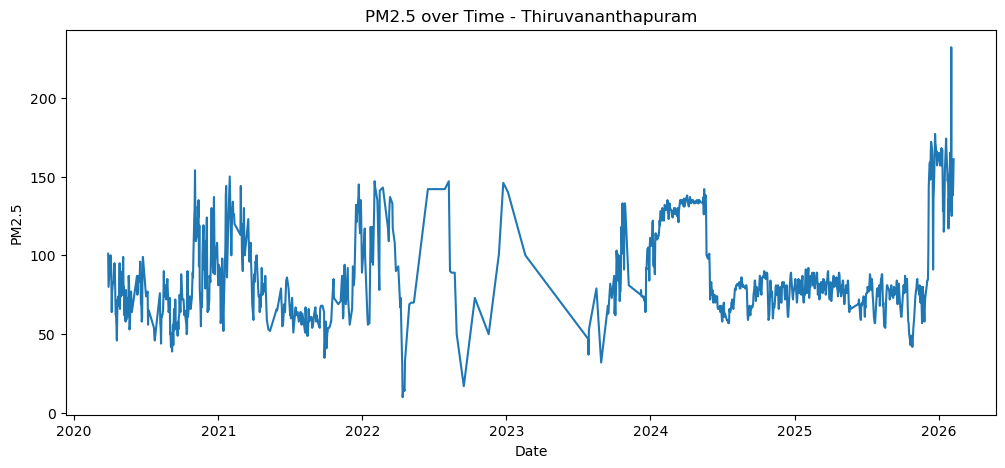

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_tvpm["date"], df_tvpm["pm25"])
plt.title("PM2.5 over Time - Thiruvananthapuram")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()


In [85]:
import pandas as pd
import numpy as np
# CPCB AQI breakpoints (India)

BREAKPOINTS = {
    "pm25": [
        (0, 30, 0, 50),
        (31, 60, 51, 100),
        (61, 90, 101, 200),
        (91, 120, 201, 300),
        (121, 250, 301, 400),
        (251, 500, 401, 500),
    ],
    "pm10": [
        (0, 50, 0, 50),
        (51, 100, 51, 100),
        (101, 250, 101, 200),
        (251, 350, 201, 300),
        (351, 430, 301, 400),
        (431, 600, 401, 500),
    ],
    "no2": [
        (0, 40, 0, 50),
        (41, 80, 51, 100),
        (81, 180, 101, 200),
        (181, 280, 201, 300),
        (281, 400, 301, 400),
        (401, 1000, 401, 500),
    ],
    "so2": [
        (0, 40, 0, 50),
        (41, 80, 51, 100),
        (81, 380, 101, 200),
        (381, 800, 201, 300),
        (801, 1600, 301, 400),
        (1601, 2000, 401, 500),
    ],
    "o3": [
        (0, 50, 0, 50),
        (51, 100, 51, 100),
        (101, 168, 101, 200),
        (169, 208, 201, 300),
        (209, 748, 301, 400),
        (749, 1000, 401, 500),
    ],
    "co": [
        (0, 1.0, 0, 50),
        (1.1, 2.0, 51, 100),
        (2.1, 10.0, 101, 200),
        (10.1, 17.0, 201, 300),
        (17.1, 34.0, 301, 400),
        (34.1, 50.0, 401, 500),
    ],
}


In [86]:
def calculate_sub_index(concentration, pollutant):
    if pd.isna(concentration):
        return np.nan
    
    for (c_low, c_high, i_low, i_high) in BREAKPOINTS[pollutant]:
        if c_low <= concentration <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low
    
    # If concentration is above highest breakpoint
    return 500


In [87]:
pollutants = ["pm25", "pm10", "no2", "so2", "co", "o3"]

for pol in pollutants:
    if pol in df_tvpm.columns:
        df_tvpm[f"AQI_{pol.upper()}"] = df_tvpm[pol].apply(lambda x: calculate_sub_index(x, pol))


In [88]:
aqi_columns = [f"AQI_{pol.upper()}" for pol in pollutants if f"AQI_{pol.upper()}" in df_tvpm.columns]

df_tvpm["AQI"] = df_tvpm[aqi_columns].max(axis=1)


In [89]:
df_tvpm[["AQI"] + aqi_columns].head()


,AQI,AQI_PM25,AQI_PM10,AQI_NO2,AQI_SO2,AQI_CO,AQI_O3
1944,235.137931,235.137931,43.0,2.50,1.25,162.405063,23.0
1945,187.468354,165.862069,53.0,3.75,1.25,187.468354,12.0
1859,231.724138,231.724138,51.0,3.75,1.25,100.000000,31.0
1860,221.482759,221.482759,45.0,3.75,1.25,100.000000,26.0
1861,189.758621,189.758621,31.0,5.00,1.25,100.000000,26.0


In [90]:
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

df_tvpm["AQI_Category"] = df_tvpm["AQI"].apply(aqi_category)


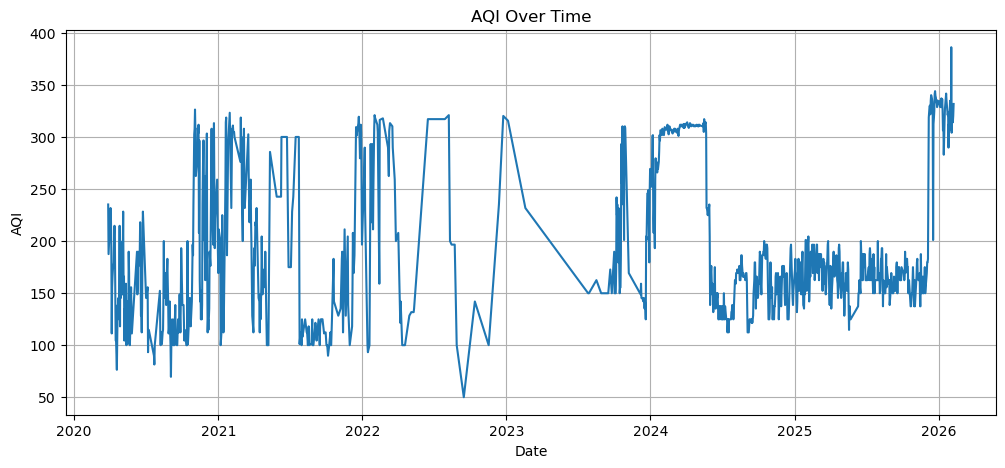

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index if df_tvpm.index.name else df_tvpm["date"], df_tvpm["AQI"])
plt.title("AQI Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


In [92]:
# Check index
print(df_tvpm.index)

# Sort by index (date)
df_tvpm = df_tvpm.sort_index()


Index([1944, 1945, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1867,
       ...
         35,   36,   37,    0,    1,    2,    3,    4,    5,    6],
      dtype='int64', length=1142)


In [93]:
# Extract AQI values
aqi_values = df_tvpm[["AQI"]].values


In [94]:
df_tvpm.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI_PM25,AQI_PM10,AQI_NO2,AQI_SO2,AQI_CO,AQI_O3,AQI,AQI_Category
1937,2020-06-22,60.0,48.0,10.0,6.0,1.0,5.0,100.000000,48.0,7.50,1.25,137.341772,10.0,137.341772,Moderate
1938,2020-06-23,93.0,55.0,14.0,5.0,1.0,1.0,207.827586,55.0,6.25,1.25,50.000000,14.0,207.827586,Poor
1939,2020-06-24,99.0,46.0,13.0,6.0,1.0,2.0,228.310345,46.0,7.50,1.25,100.000000,13.0,228.310345,Poor
1944,2020-03-28,101.0,43.0,23.0,2.0,1.0,7.0,235.137931,43.0,2.50,1.25,162.405063,23.0,235.137931,Poor
1945,2020-03-29,80.0,53.0,12.0,3.0,1.0,9.0,165.862069,53.0,3.75,1.25,187.468354,12.0,187.468354,Moderate


In [95]:
df_tvpm["date"] = pd.to_datetime(df_tvpm["date"], errors="coerce")


In [96]:
df_tvpm = df_tvpm.dropna(subset=["date"])


In [97]:
df_tvpm = df_tvpm.set_index("date")


In [98]:
df_tvpm = df_tvpm[df_tvpm.index <= "2025-12-16"]


In [99]:
print(df_tvpm.index.min(), df_tvpm.index.max(), len(df_tvpm))


2020-03-28 00:00:00 2025-12-16 00:00:00 1095


In [100]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0,1))
aqi_scaled = scaler.fit_transform(aqi_values)

LOOKBACK = 14

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

X, y = create_sequences(aqi_scaled, LOOKBACK)

print(X.shape, y.shape)


(1128, 14, 1) (1128, 1)


In [101]:
print(df_tvpm.index.min(), df_tvpm.index.max())


2020-03-28 00:00:00 2025-12-16 00:00:00


In [102]:
aqi_values = df_tvpm[["AQI"]].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
aqi_scaled = scaler.fit_transform(aqi_values)

import numpy as np

LOOKBACK = 14

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

X, y = create_sequences(aqi_scaled, LOOKBACK)

print(X.shape, y.shape)


(1081, 14, 1) (1081, 1)


In [103]:
print(df_tvpm.index.max())
print(X.shape, y.shape)


2025-12-16 00:00:00
(1081, 14, 1) (1081, 1)


In [104]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(864, 14, 1) (217, 14, 1)
(864, 1) (217, 1)


In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(14,1)),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.summary()


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 14, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0884 - val_loss: 0.0347
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0329 - val_loss: 0.0323
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0284 - val_loss: 0.0319
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0267 - val_loss: 0.0318
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0250 - val_loss: 0.0293
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0233 - val_loss: 0.0288
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0221 - val_loss: 0.0266
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0209 - val_loss: 0.0265
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0201 - val_loss: 0.0252
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0187 - val_loss: 0.0227
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0179 - val_loss: 0.0216
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

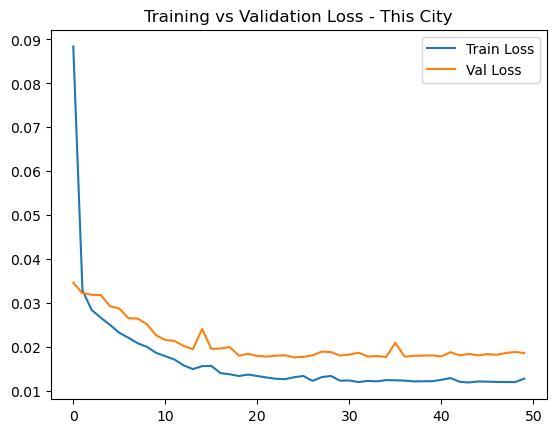

In [107]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss - This City")
plt.legend()
plt.show()


In [108]:
last_14 = aqi_scaled[-14:]

future_preds_scaled = []
current_input = last_14.copy()

for _ in range(7):
    pred = model.predict(current_input.reshape(1,14,1))
    future_preds_scaled.append(pred[0,0])
    current_input = np.vstack([current_input[1:], pred])

future_preds = scaler.inverse_transform(np.array(future_preds_scaled).reshape(-1,1))
future_preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[198.4268 ],
       [201.52713],
       [203.02715],
       [204.58595],
       [206.21342],
       [207.79881],
       [209.3772 ]], dtype=float32)

In [109]:
import pandas as pd

tvpm_last_date = df_tvpm.index.max()
tvpm_future_dates = pd.date_range(start=tvpm_last_date + pd.Timedelta(days=1), periods=7)


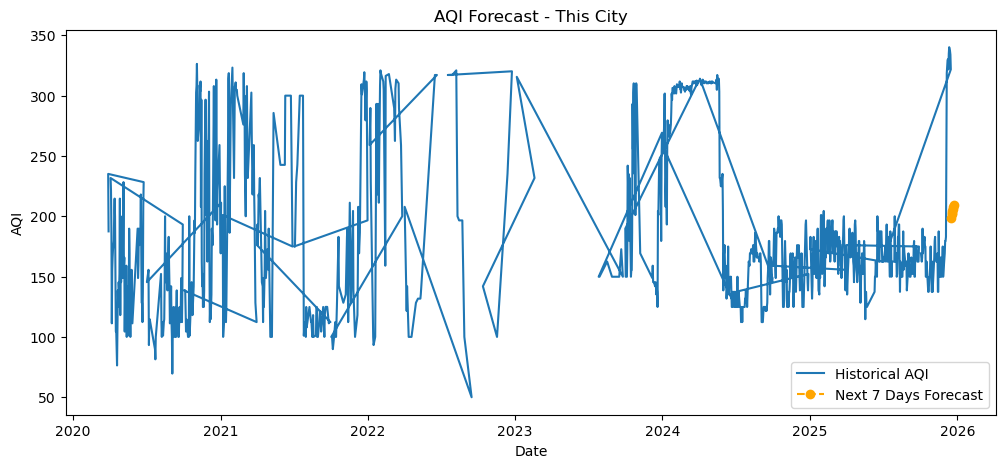

In [110]:
plt.figure(figsize=(12,5))
plt.plot(df_tvpm.index, df_tvpm["AQI"], label="Historical AQI")
plt.plot(tvpm_future_dates, future_preds, "o--", color="orange", label="Next 7 Days Forecast")
plt.legend()
plt.title("AQI Forecast - This City")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()


In [111]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Date": future_dates,
    "Delhi_AQI": future_pred_delhi.flatten(),
    "Bengaluru_AQI": future_preds_blr.flatten(),
    "Thiruvananthapuram_AQI": future_preds.flatten()
})

comparison_df


,Date,Delhi_AQI,Bengaluru_AQI,Thiruvananthapuram_AQI
0,2025-12-17,394.113525,300.335449,198.426804
1,2025-12-18,396.094452,284.662872,201.527130
2,2025-12-19,394.319000,274.177826,203.027145
3,2025-12-20,390.011749,266.632904,204.585953
4,2025-12-21,391.670471,261.069000,206.213425
5,2025-12-22,391.549347,257.311584,207.798813
6,2025-12-23,388.014435,255.179535,209.377197


In [112]:
comparison_df.to_csv("aqi_7day_forecast_comparison.csv", index=False)


In [113]:
model.save("lstm_tvm.h5")

with open("scaler_tvm.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [114]:
import os
os.listdir()


['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.eclipse',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.ivy2',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.ms-ad',
 '.p2',
 '.VirtualBox',
 '.virtual_documents',
 '.vscode',
 'AAS_Assignment.zip',
 'anaconda',
 'anaconda_projects',
 'ANN.ipynb',
 'AppData',
 'Application Data',
 'AQI (1).zip',
 'aqi_7day_forecast_comparison.csv',
 'aqi_prediction.ipynb',
 'archive (1).zip',
 'assign2_aas.ipynb',
 'Assign3.ipynb',
 'Assign4_Q1.ipynb',
 'Assign6.ipynb',
 'Assign7.ipynb',
 'Assign_10_Factor (2) (1) (1).ipynb',
 'Assign_11_SWOT (1).ipynb',
 'Assign_12_DecisionTree.ipynb',
 'Assign_13.ipynb',
 'Assign_4_ques2.ipynb',
 'Assign_5.1_NaiveBayes (1).ipynb',
 'Assign_5.2_Inferencing (1).ipynb',
 'Assign_8.1(Hypo).ipynb',
 'Assign_8.2(Hypo).ipynb',
 'Assign_8.3(Hypo).ipynb',
 'Assign_8.4(Hypo).ipynb',
 'Assign_8.5(Hypo).ipynb',
 'Assign_8.6(Hypo).ipynb',
 'Assign_9 (1).ipynb',
 'BEML.csv',
 'BigData.ipynb',
 'BigDataExamination.ipynb',
 '